# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos. 


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid",context="notebook")


## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<AxesSubplot:>

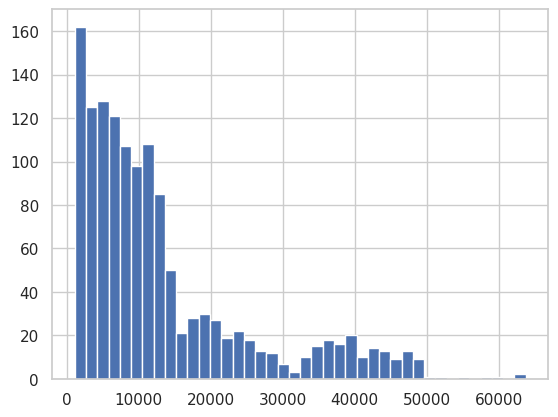

In [3]:
print(df.shape)
df.charges.hist(bins=40)

<AxesSubplot:>

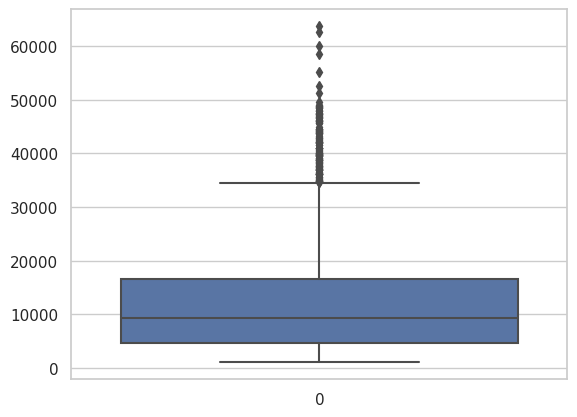

In [4]:
sns.boxplot(data=df.charges)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [5]:
df[df.charges>50000]
df=df[df.charges<50000]

En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio. 

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan. 

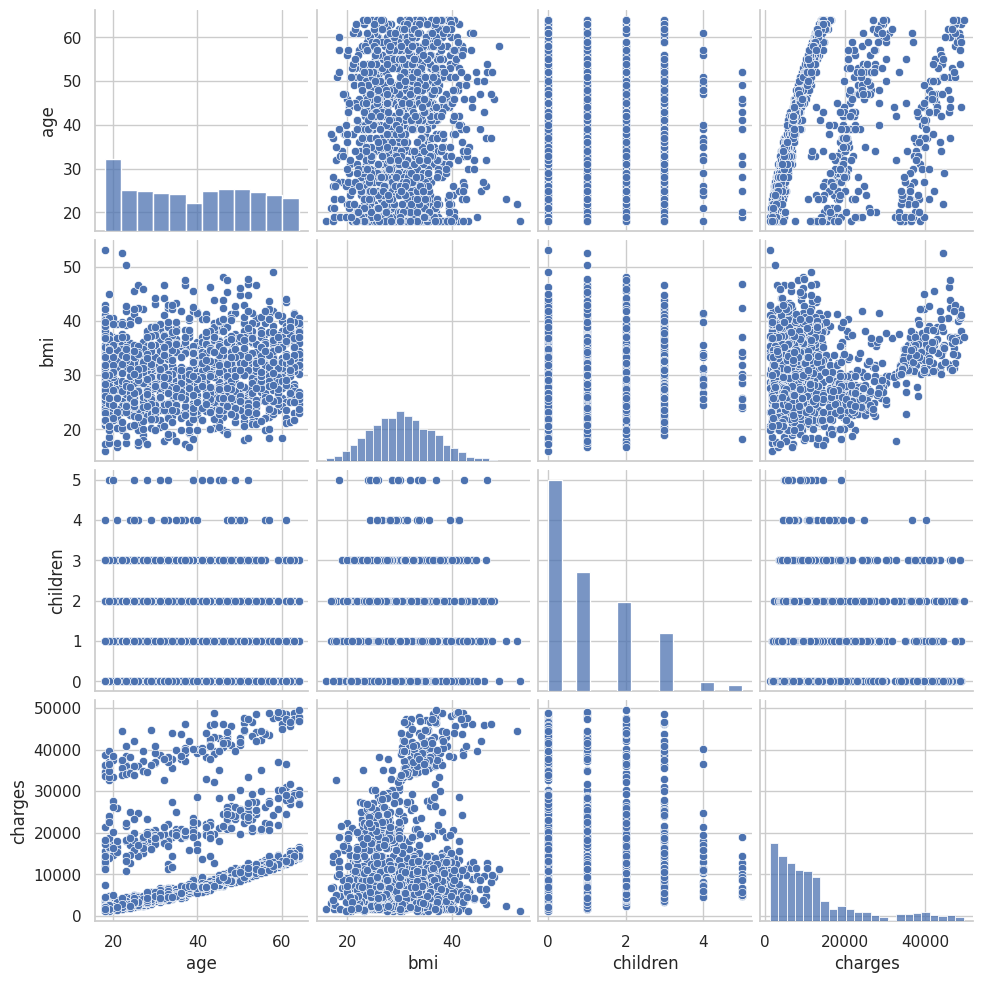

In [6]:
import matplotlib.pyplot as plt

sns.pairplot(df,height=2.5)

/tmp/ipykernel_2589/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

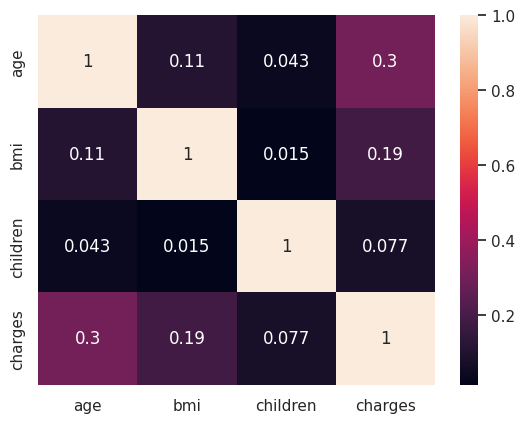

In [7]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='age', ylabel='charges'>

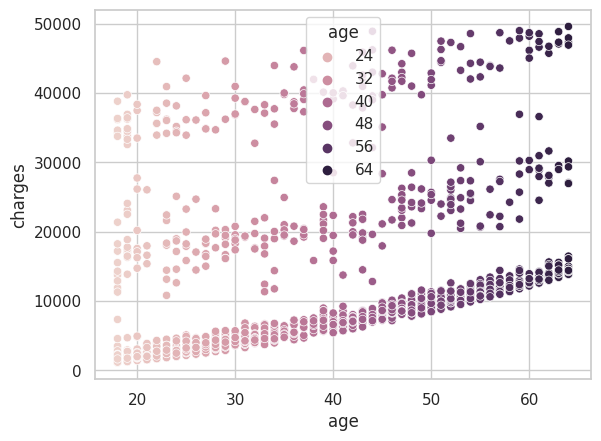

In [8]:
sns.scatterplot(data=df,x="age",y="charges",hue="age")

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas. 

Ahora la verás en acción

In [9]:
df =pd.get_dummies(df,columns=["sex","smoker","region"],drop_first=True)
 #drop first se elimina la primra columna haciendo que se reduzcan la cantidad de columnas inecesarias 
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Creando modelos 
Primero se usará un modelo con todas las variables.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X_cols=list(set(df.columns)-set(["charges"]))
y_cols=["charges"]

X=df[X_cols].values
y=df[y_cols].values


X_train,X_test,y_train,y_test=train_test_split(X,y)
x_scale=StandardScaler().fit(X)
y_scale=StandardScaler().fit(y)

X_train=x_scale.transform(X_train)
X_test=x_scale.transform(X_test)
y_train=y_scale.transform(y_train)
y_test=y_scale.transform(y_test)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [12]:
y_pred.shape

(333, 1)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [13]:
import sklearn.metrics as metrics

mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)

print("MSE :",mse)
print("R2 :",r2)

MSE : 0.25453646587676015
R2 : 0.6847992885640246


El siguiente código muestra un resumen general de los resultados.

In [14]:
from regressors import stats
model.intercept_=model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [15]:
y_test=y_test.reshape(-1)

print("===========Summary===========")
stats.summary(model,X_test,y_test,X_cols)

===========Summary===========
Residuals:
    Min      1Q  Median     3Q    Max
-1.8053 -0.0747  0.0863 0.2392 0.9873


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.010546    0.027847   0.3787  0.705153
region_southwest -0.037086    0.033396  -1.1105  0.267591
sex_male          0.009827    0.027991   0.3511  0.725765
age               0.311672    0.027895  11.1729  0.000000
children          0.033627    0.028252   1.1903  0.234790
region_northwest -0.004439    0.031506  -0.1409  0.888043
smoker_yes        0.824009    0.028334  29.0816  0.000000
region_southeast -0.044402    0.033332  -1.3321  0.183730
bmi               0.162864    0.028911   5.6332  0.000000
---
R-squared:  0.68480,    Adjusted R-squared:  0.67702
F-statistic: 87.99 on 8 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

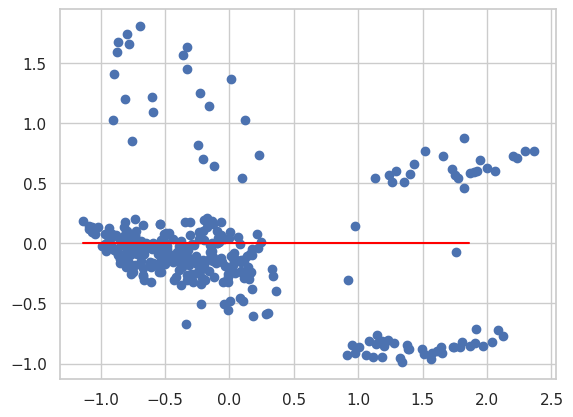

In [17]:
import numpy as np
residuals =np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
x= list(np.arange(y_pred.min(),y_pred.max()))
y= [0]*len(x)
plt.plot(x,y,color="red")


## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [18]:
df_sec=df.copy()
df_sec["age2"]=df_sec["age"]**2
df_sec["sobrepeso"]=(df_sec.bmi>30).astype(int)
df_sec["sobrepeso*fumador"]=df_sec.sobrepeso*df_sec.smoker_yes

In [19]:
df_sec

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,sobrepeso,sobrepeso*fumador
0,19,27.900,0,16884.92400,0,1,0,0,1,361,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,324,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,784,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0,1089,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,1024,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,2500,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0,324,1,0
1335,18,36.850,0,1629.83350,0,0,0,1,0,324,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1,441,0,0


Analizando el segundo modelo

In [20]:
X_cols=list(set(df_sec.columns)-set(["charges"]))
y_cols=["charges"]

X=df_sec[X_cols].values
y=df_sec[y_cols].values


X_train,X_test,y_train,y_test=train_test_split(X,y)
x_scale=StandardScaler().fit(X)
y_scale=StandardScaler().fit(y)

X_train=x_scale.transform(X_train)
X_test=x_scale.transform(X_test)
y_train=y_scale.transform(y_train)
y_test=y_scale.transform(y_test)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [21]:
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)

print("MSE :",mse)
print("R2 :",r2)

MSE : 0.12693628084126776
R2 : 0.8663014008163884


In [22]:
model.intercept_=model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [23]:
y_test=y_test.reshape(-1)

print("===========Summary===========")
stats.summary(model,X_test,y_test,X_cols)

===========Summary===========
Residuals:
    Min     1Q  Median     3Q  Max
-1.8132 0.0528  0.0999 0.1354 0.26


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.003398    0.019760  -0.1720  0.863555
region_southwest  -0.037604    0.022332  -1.6839  0.093147
sex_male          -0.010177    0.019711  -0.5163  0.606000
age               -0.101135    0.111409  -0.9078  0.364649
children           0.077545    0.020151   3.8482  0.000143
age2               0.425354    0.111500   3.8148  0.000162
region_northwest  -0.012440    0.023154  -0.5373  0.591445
sobrepeso         -0.049114    0.030750  -1.5972  0.111175
sobrepeso*fumador  0.497973    0.029347  16.9683  0.000000
smoker_yes         0.456777    0.029988  15.2318  0.000000
region_southeast  -0.025379    0.023283  -1.0900  0.276493
bmi                0.055464    0.031725   1.7483  0.081340
---
R-squared:  0.86630,    Adjusted R-squared:  0.86172
F-statistic: 189.08 on 11 features


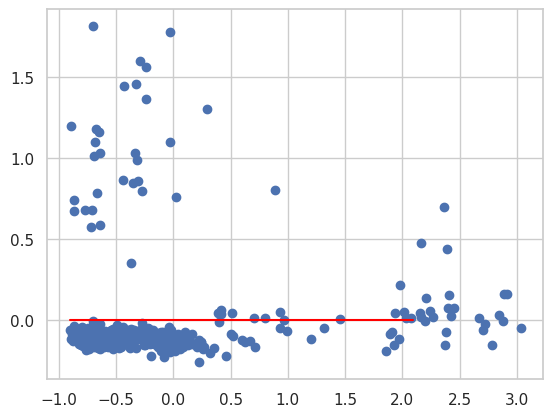

In [24]:
import numpy as np
residuals =np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
x= list(np.arange(y_pred.min(),y_pred.max()))
y= [0]*len(x)
plt.plot(x,y,color="red")